# **PROJECT OVERVIEW**
The project's main focus is on solving a classification problem for a certain telecommunications company, SyriaTel.The primary objective is to develop a machine learning classifier that accurately predicts which customers are likely to churn. By identifying these individuals in advance, SyriaTel can implement proactive retention strategies to mitigate revenue loss.

# **BUSINESS UNDERSTANDING**
Customer retention in the telecommunications industry is more profitable than acquisition. SyriaTel operates in a saturated market where "churn"—the rate at which customers stop doing business with an entity- directly threatens long-term profitability. This project aims to leverage historical customer data to build a predictive "Early Warning System."

## **The Problem Statement**
SyriaTel is losing customers to competitors, but the specific triggers for these departures are not being identified until it is too late. Currently, the company lacks a data-driven method to: identify high-risk customers, prioritise retention efforts, and understand the specific pain points driving churn.

## **Objectives & Success Criteria**
The primary objective is to develop a binary classification model where the target variable is Churn (True/False).

- Primary Metric: Recall. Because the cost of losing a customer is much higher than the cost of a promotional incentive, we must maximise our "capture rate." Our goal is a Recall score of >80%.

- Secondary Metric: Precision. To ensure the marketing budget is not wasted on "loyal" customers, we aim to maintain a Precision score that justifies the ROI of retention campaigns.

- Actionable Insight: Identify the top 3–5 features that predict churn, allowing the business to address root causes (e.g., adjusting daytime rates or improving customer service protocols).

# **DATA UNDERSTANDING**
We utilise the [Syriatel_dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) of 3,333 records that is exceptionally clean, with no missing values or structural issues requiring significant cleaning. The features include account profiles, usage metrics (minutes and charges), and customer service calls. Our target variable is churn, which is highly imbalanced, as only 14.5% of customers in the dataset actually left the service.

In [1]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read dataset into notebook
customer_churn = pd.read_csv('Data/customer_churn.csv')
# check out the shape and first five rows
print(customer_churn.shape)
customer_churn.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# check dataframe summary
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# statistical summary
customer_churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# **DATA PREPARATION**
In this section, we process the categorical and numerical features to optimise the dataset for modelling. Our preparation involves dropping redundant features (such as phone number) that lack predictive power and removing highly correlated variables to prevent multicollinearity. To ensure the models perform reliably, we scale the numerical data and encode categorical variables, creating a consistent format that allows our classifiers to accurately distinguish between churners and loyal customers.

In [5]:
# check out categorical columns
categorical = customer_churn.select_dtypes(exclude=["int64", "float64"]).copy()
categorical

,state,phone number,international plan,voice mail plan,churn
0,KS,382-4657,no,yes,False
1,OH,371-7191,no,yes,False
2,NJ,358-1921,no,no,False
3,OH,375-9999,yes,no,False
4,OK,330-6626,yes,no,False
...,...,...,...,...,...
3328,AZ,414-4276,no,yes,False
3329,WV,370-3271,no,no,False
3330,RI,328-8230,no,no,False
3331,CT,364-6381,yes,no,False


In [6]:
# drop columns not useful for correlation
churn_customer = customer_churn.drop(columns=['phone number', 'area code', 'number vmail messages'])

# encode a few categorical columns
churn_customer = pd.get_dummies(churn_customer, columns=['state'], drop_first=False)

ohe_cols = ['international plan', 'voice mail plan', 'churn']

# label the encoding
for col in ohe_cols:
    if churn_customer[col].dtype == 'object':
        # 'yes'/'no' columns
        churn_customer[col] = churn_customer[col].map({'yes': 1, 'no': 0})
    elif churn_customer[col].dtype == 'bool':
        # 'True'/'False' column (churn)
        churn_customer[col] = churn_customer[col].astype(int)

# Check the first few rows after encoding
print("\nData Head after Encoding:")
print(churn_customer[ohe_cols].head())

# Calculate the correlation matrix
correlation_matrix = churn_customer.corr()
correlation_matrix


Data Head after Encoding:
   international plan  voice mail plan  churn
0                   0                1      0
1                   0                1      0
2                   0                0      0
3                   1                0      0
4                   1                0      0


,account length,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
account length,1.000000,0.024735,0.002918,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,...,0.014912,-0.026651,-0.013148,-0.000397,0.018810,0.012627,0.003555,-0.008476,-0.025631,0.018058
international plan,0.024735,1.000000,0.006006,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,...,-0.006214,0.007003,-0.006819,-0.006819,0.010383,-0.007445,-0.017442,0.002959,-0.018913,0.017134
voice mail plan,0.002918,0.006006,1.000000,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,...,0.022208,-0.003545,-0.018072,0.000382,-0.014735,-0.019218,-0.039753,0.006313,-0.001233,-0.014735
total day minutes,0.006216,0.049396,-0.001684,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,...,0.024650,-0.009345,0.004752,0.010353,-0.007147,0.006200,-0.002695,-0.001832,-0.019383,0.001115
total day calls,0.038470,0.003755,-0.011086,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,...,-0.037914,0.006444,-0.003329,-0.010940,0.037767,-0.000797,0.005393,-0.028977,0.030234,0.013681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
state_VT,0.012627,-0.007445,-0.019218,0.006200,-0.000797,0.006207,0.012950,-0.018353,0.012966,0.018102,...,-0.020261,-0.019022,-0.022235,-0.022235,-0.023012,1.000000,-0.021269,-0.023165,-0.027121,-0.023012
state_WA,0.003555,-0.017442,-0.039753,-0.002695,0.005393,-0.002697,0.007933,-0.031195,0.007938,-0.002323,...,-0.019244,-0.018068,-0.021120,-0.021120,-0.021858,-0.021269,1.000000,-0.022002,-0.025760,-0.021858
state_WI,-0.008476,0.002959,0.006313,-0.001832,-0.028977,-0.001839,-0.010750,-0.004475,-0.010741,-0.005028,...,-0.020959,-0.019678,-0.023002,-0.023002,-0.023805,-0.023165,-0.022002,1.000000,-0.028056,-0.023805
state_WV,-0.025631,-0.018913,-0.001233,-0.019383,0.030234,-0.019380,-0.044919,-0.018722,-0.044945,0.000658,...,-0.024539,-0.023039,-0.026930,-0.026930,-0.027871,-0.027121,-0.025760,-0.028056,1.000000,-0.027871


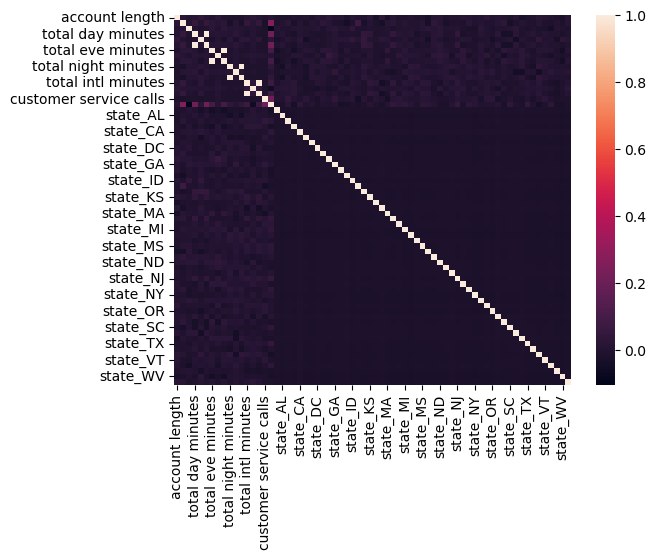

In [7]:
# plot correlation heatmap
sns.heatmap(correlation_matrix);

# **FEATURE CORRELATION ANALYSIS**
In this section, we examine the statistical relationships between our features and the target vector, churn. By identifying the strongest positive and negative correlations, we can determine which observations serve as the most significant "red flags" for customers leaving. This analysis ensures our model prioritises the most impactful signals while helping us identify and remove redundant features that provide overlapping information.

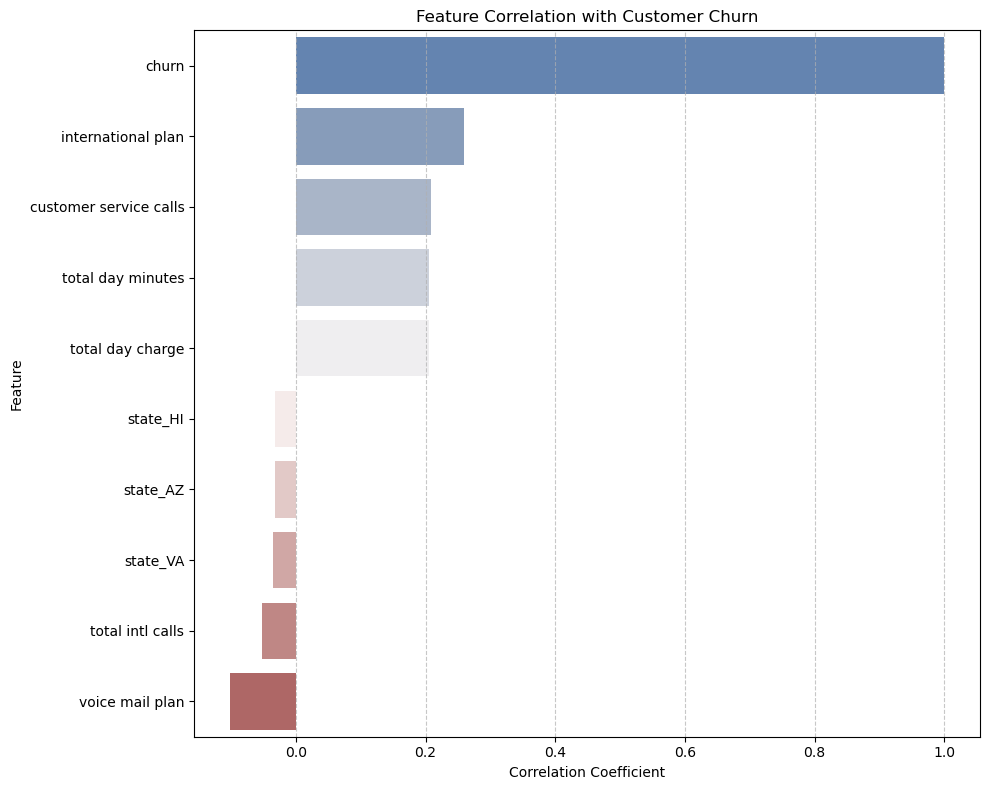

In [8]:
# check top correlated features
correlated_features = churn_customer.corr()['churn'].sort_values(ascending=False)
# select top and bottom features correlated with churn
top_features = correlated_features.head()
bottom_features = correlated_features.tail()
# combine top and bottom features
corr_feat = pd.concat([top_features,bottom_features])
# correlation barplot
plt.figure(figsize=(10,8))
sns.barplot(
    x=corr_feat.values,
    y=corr_feat.index,
    palette='vlag',
    orient='h'
)
plt.title('Feature Correlation with Customer Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xticks(rotation=0)
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

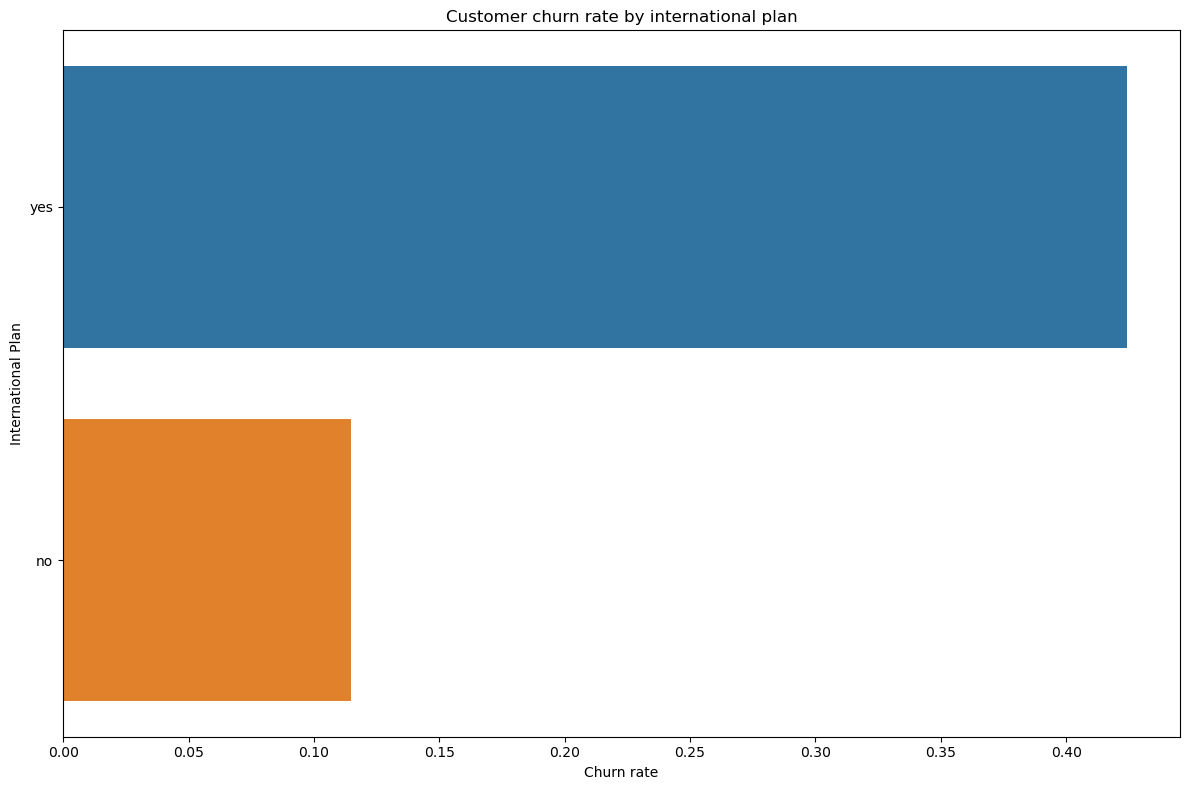

In [9]:
# churn per international plan
intl_plan = customer_churn.groupby('international plan')['churn'].mean().sort_values(ascending=False)
# plot churn rate by international plan
plt.figure(figsize=(12,8))
sns.barplot(
    x=intl_plan.values,
    y=intl_plan.index,
    orient='h'
    
)

# title and labels
plt.title('Customer churn rate by international plan')
plt.xlabel('Churn rate')
plt.ylabel('International Plan')
plt.tight_layout()
plt.show()

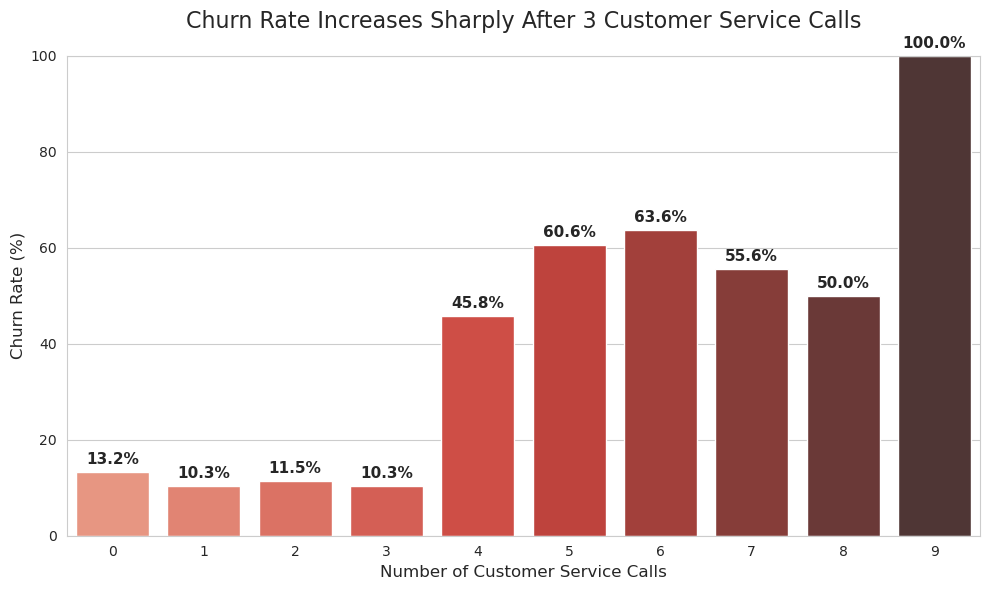

In [10]:
# 1. Calculate the churn rate per number of customer service calls
# We group by the number of calls and take the mean of the churn column (since 1=churn, 0=not)
churn_by_service_calls = churn_customer.groupby('customer service calls')['churn'].mean().reset_index()

# Convert churn rate to percentage for easier reading
churn_by_service_calls['churn_rate'] = churn_by_service_calls['churn'] * 100

# 2. Create the visualization
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the bar plot
barplot = sns.barplot(
    x='customer service calls', 
    y='churn_rate', 
    data=churn_by_service_calls, 
    palette='Reds_d' # Using a 'Reds' palette to highlight the "danger" zone
)

# 3. Add labels and title
plt.title('Churn Rate Increases Sharply After 3 Customer Service Calls', fontsize=16, pad=20)
plt.xlabel('Number of Customer Service Calls', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

# Optional: Add data labels on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=11, fontweight='bold')

plt.ylim(0, 100) # Set y-axis to 100%
plt.tight_layout()
plt.show()

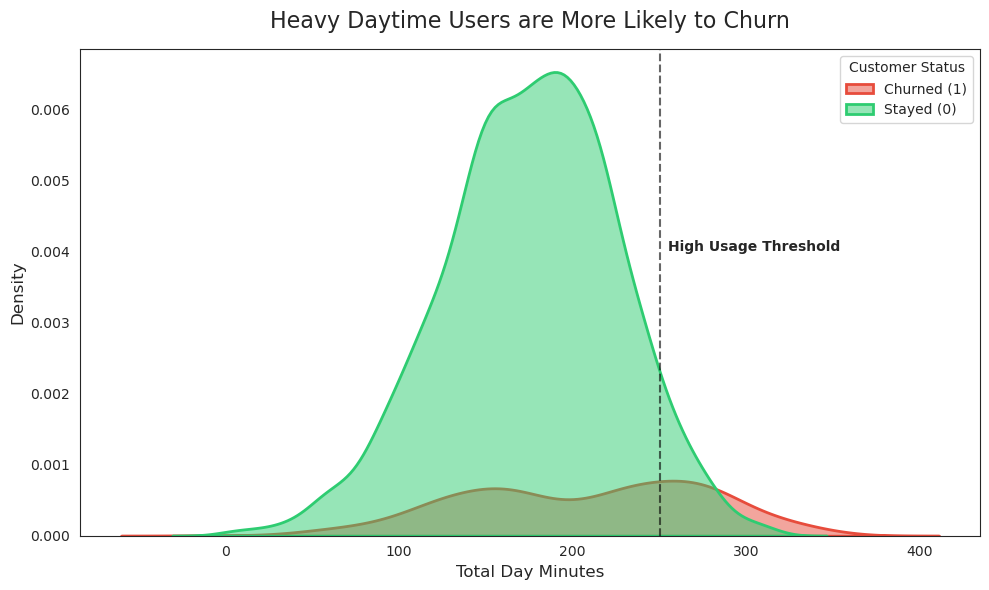

In [11]:
# total day minutes vs churn

plt.figure(figsize=(10, 6))
sns.set_style("white")

# 1. Create a Density Plot (KDE)
# This shows the "shape" of the data for both groups
sns.kdeplot(data=churn_customer, x='total day minutes', hue='churn', fill=True, 
            palette=['#2ecc71', '#e74c3c'], alpha=0.5, linewidth=2)

# 2. Formatting
plt.title('Heavy Daytime Users are More Likely to Churn', fontsize=16, pad=15)
plt.xlabel('Total Day Minutes', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Customer Status', labels=['Churned (1)', 'Stayed (0)'])

# Add a vertical line at the typical "danger zone" (e.g., 250 mins)
plt.axvline(x=250, color='black', linestyle='--', alpha=0.6)
plt.text(255, 0.004, 'High Usage Threshold', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

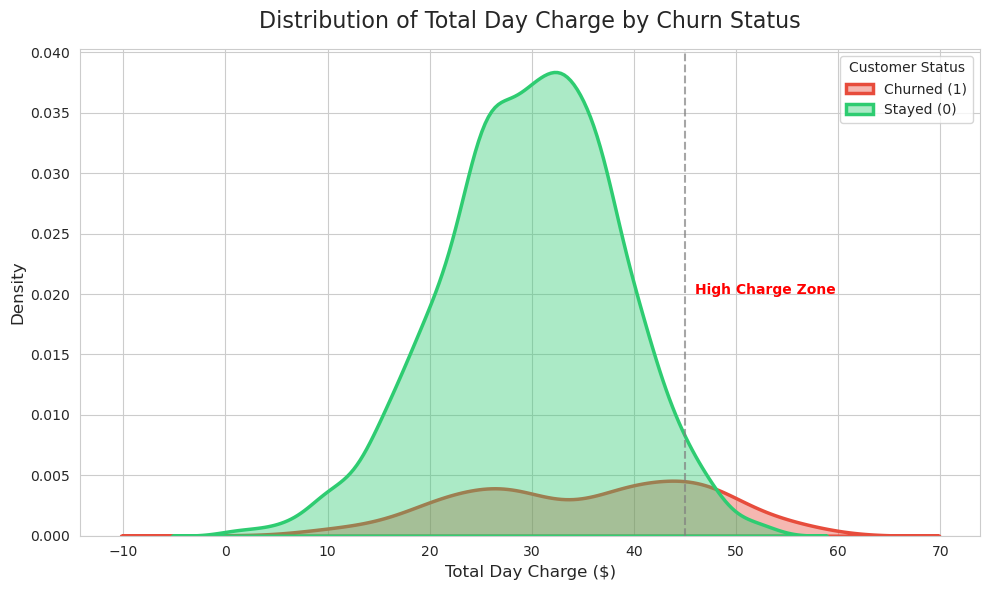

In [12]:
# total day charge vs churn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# 1. Create the Density Plot
sns.kdeplot(data=churn_customer, x='total day charge', hue='churn', fill=True, 
            palette=['#2ecc71', '#e74c3c'], alpha=0.4, linewidth=2.5)

# 2. Add specific formatting
plt.title('Distribution of Total Day Charge by Churn Status', fontsize=16, pad=15)
plt.xlabel('Total Day Charge ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Customer Status', labels=['Churned (1)', 'Stayed (0)'])

# 3. Add a reference line for the high-charge threshold
# Usually, churn spikes significantly after $40-$45
plt.axvline(x=45, color='gray', linestyle='--', alpha=0.7)
plt.text(46, 0.02, 'High Charge Zone', fontsize=10, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

The large "hump" is centered around $25–$35. This indicates that the vast majority of loyal customers have moderate daytime usage and charges.
The red curve has a distinct, secondary "hump" or a "long tail" stretching to the right. 
This shows that a significant portion of churned customers were being charged much more than average.

In [13]:
churn_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

# **THE CURSE OF DIMENSIONALITY: STATE FEATURE**
We have opted to drop the State column to avoid the issues associated with high dimensionality. One-hot encoding this feature creates over 50 new binary columns, drastically increasing the feature space. This expansion can lead to longer training times, slower predictions, and a higher risk of overfitting, where the model learns noise rather than meaningful patterns.

The correlation analysis confirms that individual states have a very low correlation with our target, churn. Since each state contributes minimal predictive power, the complexity introduced by these extra features does not justify their inclusion in the final model.

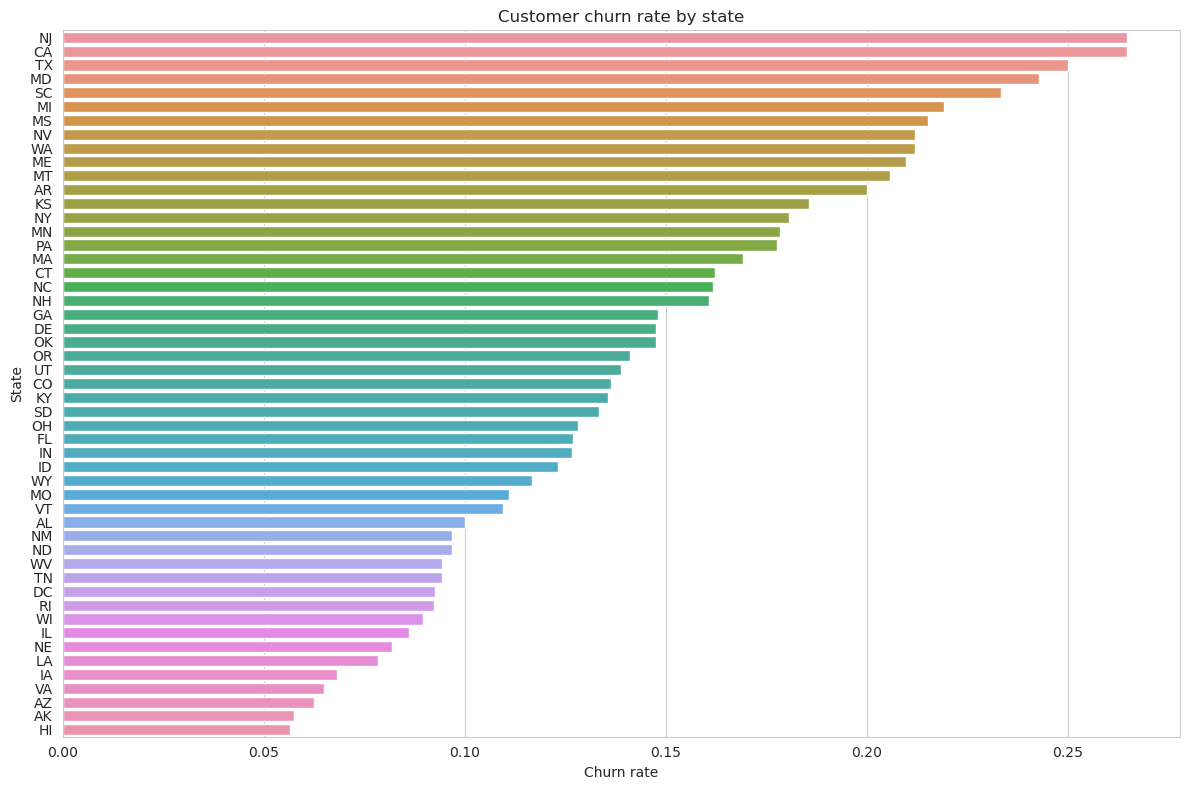

In [14]:
# churn per state
state_churn = customer_churn.groupby('state')['churn'].mean().sort_values(ascending=False)
# plot churn rate by state
plt.figure(figsize=(12,8))
sns.barplot(
    x=state_churn.values,
    y=state_churn.index,
    orient='h'
    
)

# title and labels
plt.title('Customer churn rate by state')
plt.xlabel('Churn rate')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [15]:
churn_customer.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,0,1,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,False
1,107,0,1,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,False
2,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,1,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,False,False
4,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,False,False


# **FEATURE ENGINEERING AND SCALING**
We split the dataset into training and testing sets before applying a MinMaxScaler to prevent data leakage and ensure all numerical features share a consistent range. Following this, we remove the high-cardinality state features to streamline the model and avoid the Curse of Dimensionality.

In [16]:
# Separate features and target
X = churn_customer.drop('churn', axis=1)
y = churn_customer['churn']

# Perform Train-Test Split first to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify and drop 'state' columns from both sets
state_cols = [col for col in X_train.columns if col.startswith('state_')]
X_train = X_train.drop(columns=state_cols)
X_test = X_test.drop(columns=state_cols)

# Identify numerical columns
numeric = X_train.select_dtypes(include=np.number).columns.tolist()

# Scale the data
scaler = MinMaxScaler()

# Fit ONLY on X_train, then transform both X_train and X_test
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

X_train.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,1.000000,0.0,0.0,0.266801,0.459259,0.266892,0.450096,0.370588,0.450016,0.648198,0.598592,0.648536,0.330,0.315789,0.329630,0.222222
1373,0.442149,0.0,0.0,0.314187,0.555556,0.314189,0.532582,0.647059,0.532514,0.499462,0.422535,0.499701,0.205,0.210526,0.205556,0.444444
679,0.305785,1.0,0.0,0.631246,0.355556,0.631250,0.899093,0.652941,0.899385,0.497041,0.500000,0.497310,0.435,0.473684,0.435185,0.111111
56,0.578512,0.0,0.0,0.356979,0.503704,0.356926,0.494913,0.364706,0.494985,0.316299,0.669014,0.316796,0.400,0.105263,0.400000,0.111111
1993,0.351240,0.0,0.0,0.613728,0.488889,0.613682,0.732197,0.452941,0.732449,0.513179,0.542254,0.513449,0.225,0.157895,0.225926,0.000000


# **CHECKING FOR CLASS BALANCE**
It is important to check the balance between our two classes. What percentage churned, and what percentage did not churn? In this section, we will calculate the relative frequencies of the classes and also check the raw counts. The positive class 'churn' is represented with 1, and the negative class 'no churn' is represented with 0

In [17]:
# Check churn percentage
print('Raw counts: \n')
print(churn_customer['churn'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(churn_customer['churn'].value_counts(normalize=True))

Raw counts: 

churn
0    2850
1     483
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64


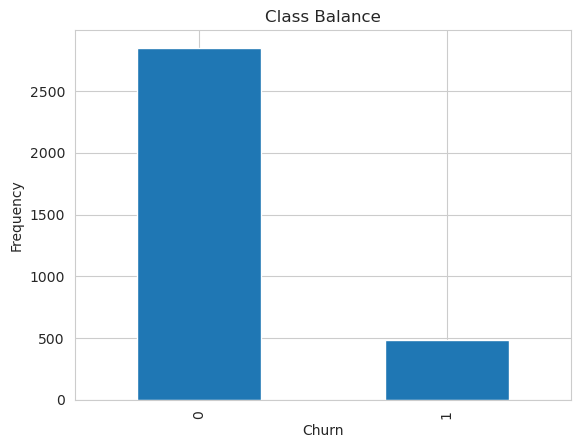

In [18]:
# plot class imbalance
churn_customer['churn'].value_counts().plot(
    kind='bar',
    xlabel = 'Churn',
    ylabel = 'Frequency',
    title = 'Class Balance'
);

# **SIMPLE LOGISTIC REGRESSION MODEL**
In this section, we establish a baseline by fitting a Logistic Regression model using a balanced class weight to account for the churn imbalance. This initial model allows us to evaluate how well a linear classifier can distinguish between classes before we explore more complex algorithms.

In [19]:
# create an instance of the logistic regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear',class_weight='balanced')
# fit model to training data
model_log = log_reg.fit(X_train, y_train)
model_log

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [20]:
# predict
y_pred_log = log_reg.predict(X_test)

In [21]:
# calculate probability scores for each datapoint
y_score = log_reg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [22]:
# calculate AUC score
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.827572333205052


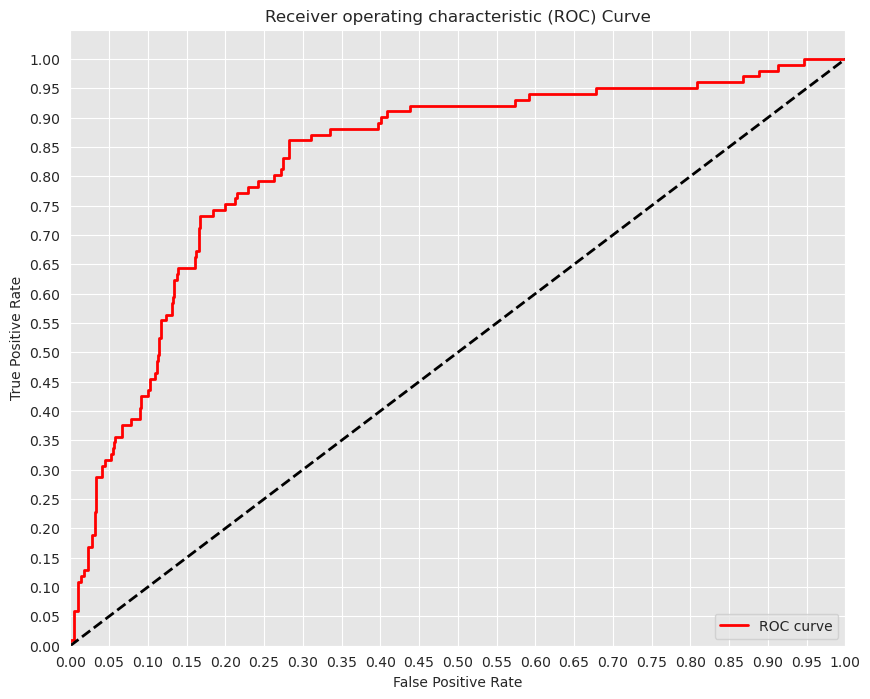

In [23]:
# set seaborn style
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
# plot ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
print("Accuracy",round(accuracy_score(y_test, y_pred_log), 4),
        "Precision",round(precision_score(y_test, y_pred_log), 4),
        "Recall",round(recall_score(y_test, y_pred_log), 4),
        "F1-Score",round(f1_score(y_test, y_pred_log), 4),
        "ROC-AUC",round(roc_auc_score(y_test, y_score), 4))

Accuracy 0.7841 Precision 0.3897 Recall 0.7525 F1-Score 0.5135 ROC-AUC 0.8276


In [25]:
# print confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_log)
print(cnf_matrix)

[[447 119]
 [ 25  76]]


<Figure size 800x600 with 0 Axes>

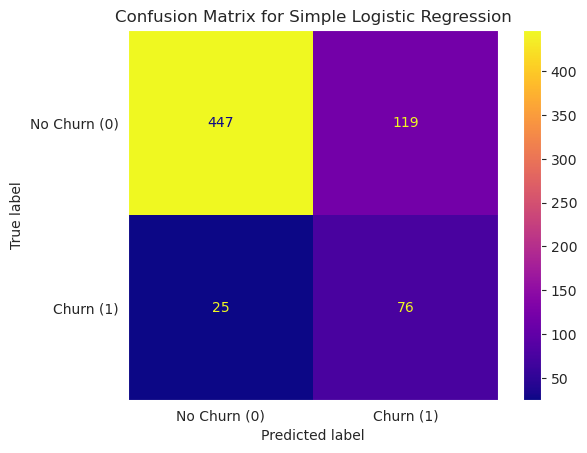

In [26]:
# visualize confusion matrix
plt.figure(figsize=(8, 6))
# ConfusionMatrixDisplay
plot_matrix = ConfusionMatrixDisplay(cnf_matrix, display_labels=['No Churn (0)', 'Churn (1)']);
plot_matrix.plot(cmap='plasma', values_format='d');
plt.title('Confusion Matrix for Simple Logistic Regression')
plt.grid(False); # turn off grid
plt.show();

#  **Hyperparameter Tuning: Logistic Regression**
Following our baseline, we create a tuned Logistic Regression model by adjusting the regularisation strength ($C=0.01$) and applying an L2 penalty. These hyperparameters help control model complexity and prevent overfitting, ensuring that our classifier generalises well to new SyriaTel customer data while maintaining a focus on the class imbalance.

In [27]:
# create an instance of a logistic regression model with hyperparameters
log_reg2 = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced',C=0.01,penalty='l2')
# fit model to training data
model_log2 = log_reg2.fit(X_train, y_train)
model_log2

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.01
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [28]:
# predict
y_pred_log2 = log_reg2.predict(X_test)

In [29]:
# calculate probability scores for each datapoint
y_score2 = log_reg2.fit(X_train, y_train).decision_function(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)

In [30]:
# calculate AUC score
print('AUC: {}'.format(auc(fpr2, tpr2)))

AUC: 0.7874085995171954


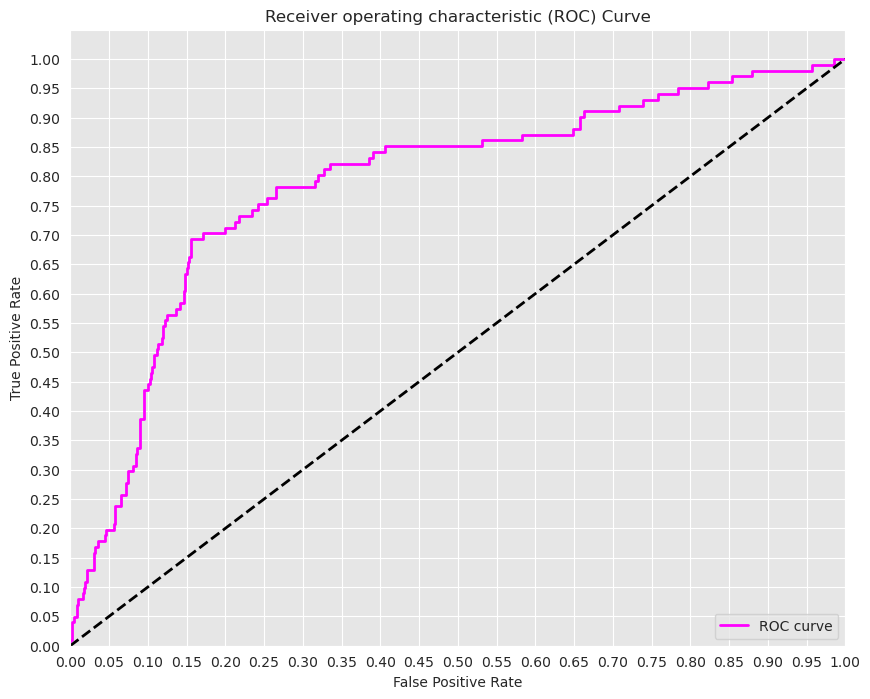

In [31]:
# set seaborn style
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
# plot ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr2, tpr2, color='magenta',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
print("Accuracy",round(accuracy_score(y_test, y_pred_log2), 4),
        "Precision",round(precision_score(y_test, y_pred_log2), 4),
        "Recall",round(recall_score(y_test, y_pred_log2), 4),
        "F1-Score",round(f1_score(y_test, y_pred_log2), 4),
        "ROC-AUC",round(roc_auc_score(y_test, y_score2), 4))

Accuracy 0.7466 Precision 0.3468 Recall 0.7624 F1-Score 0.4768 ROC-AUC 0.7874


In [33]:
# print confusion matrix
cnf_matrix2 = confusion_matrix(y_test,y_pred_log2)
print(cnf_matrix2)

[[421 145]
 [ 24  77]]


<Figure size 800x600 with 0 Axes>

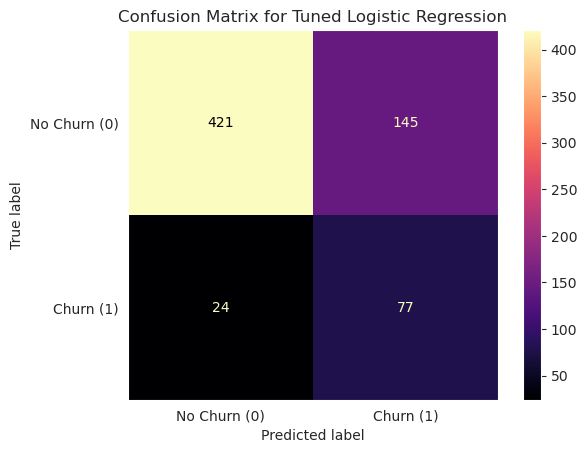

In [34]:
# visualize confusion matrix
plt.figure(figsize=(8, 6))
# ConfusionMatrixDisplay
plot_matrix2 = ConfusionMatrixDisplay(cnf_matrix2, display_labels=['No Churn (0)', 'Churn (1)'])
plot_matrix2.plot(cmap='magma', values_format='d')
plt.title('Confusion Matrix for Tuned Logistic Regression')
plt.grid(False); # turn off grid
plt.show();

# **BUILD SIMPLE DECISION TREE CLASSIFIER**
In this section, we transition to a non-linear model by implementing a Decision Tree Classifier using the entropy criterion to measure information gain. This model allows us to capture more complex, non-linear relationships between customer features that a linear logistic regression might overlook

In [35]:
# create an instance of decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42, criterion='entropy')
tree_model.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curr

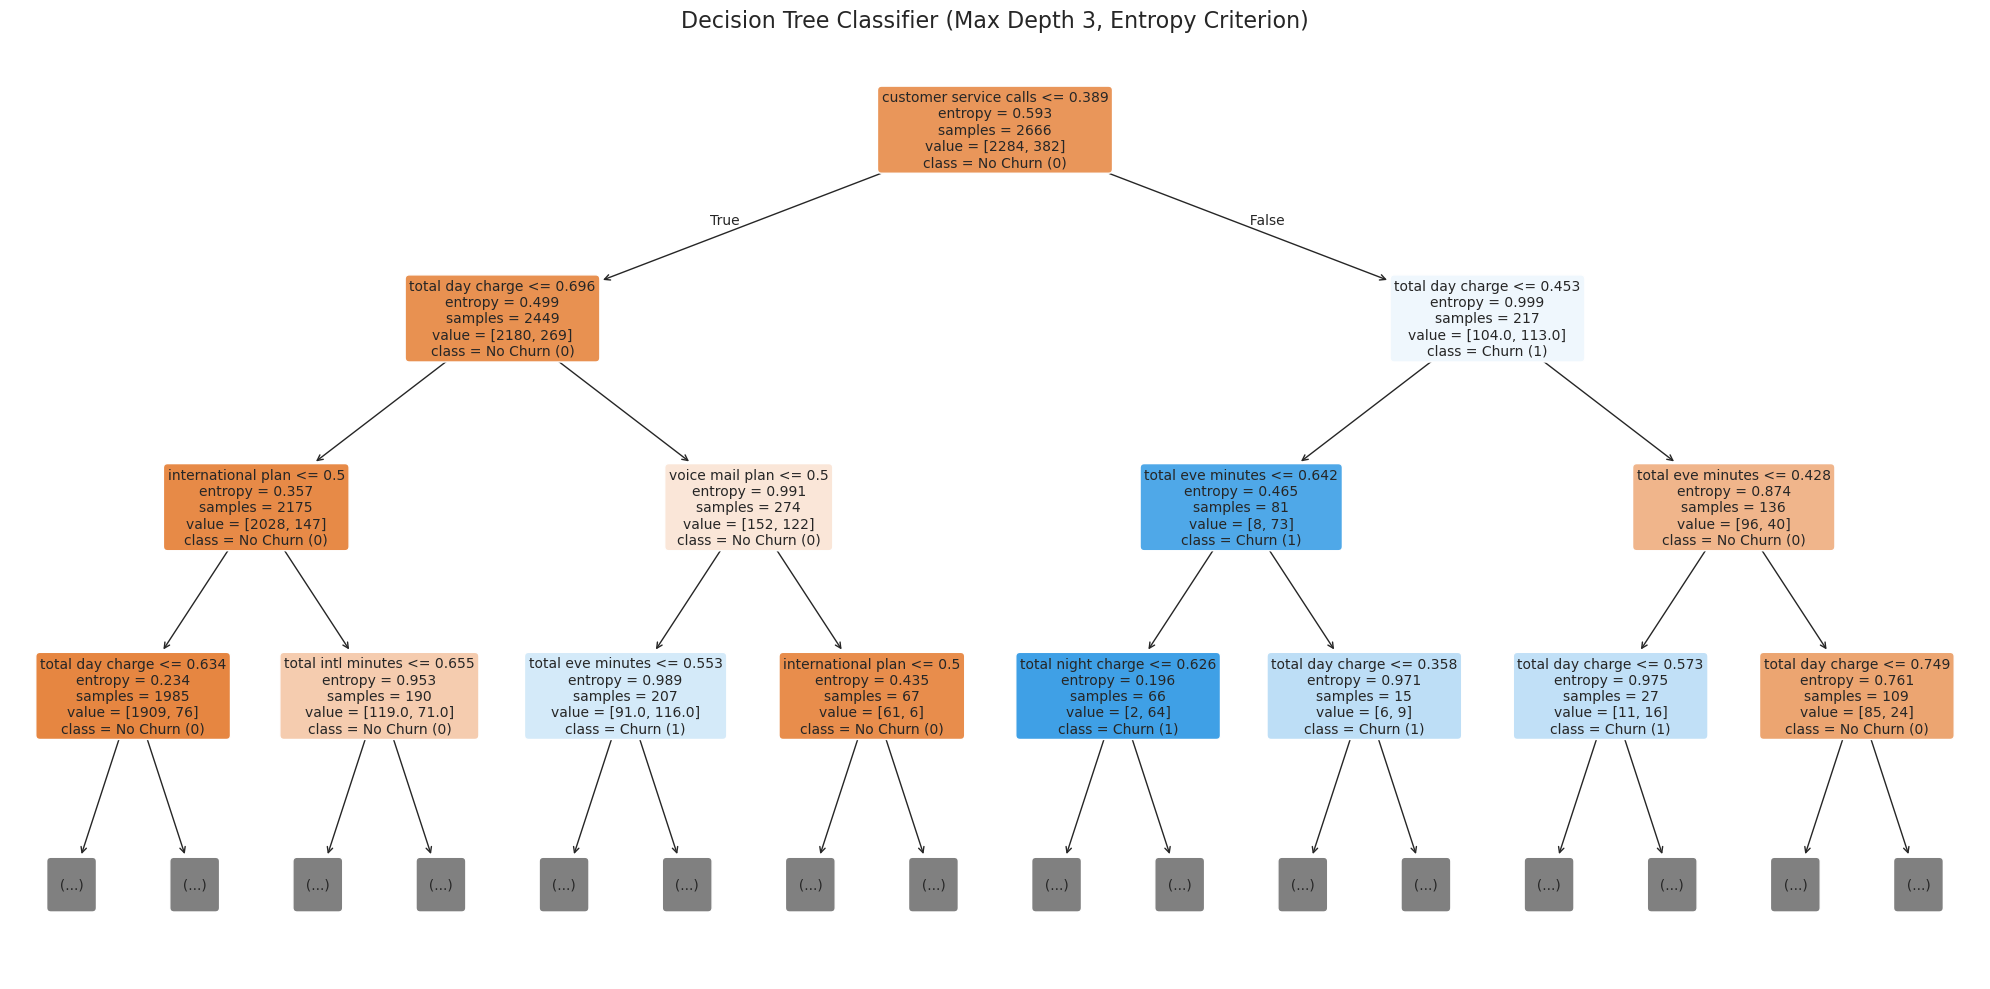

In [36]:
# plot decision tree classifier with depth of three
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model, 
    max_depth=3,  # Only show the top 3 levels
    feature_names=X_train.columns.tolist(),
    class_names=['No Churn (0)', 'Churn (1)'],
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Decision Tree Classifier (Max Depth 3, Entropy Criterion)", fontsize=16)
plt.tight_layout()
plt.show();

In [37]:
y_pred_tree = tree_model.predict(X_test)

In [38]:
# check probabilities
y_probs_tree = tree_model.predict_proba(X_test)[:, 1]
# Calculate the FPR and TPR
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_probs_tree)
# Calculate the AUC score
roc_auc = auc(fpr_tree, tpr_tree)
print(roc_auc)

0.8340009796032607


In [39]:
# calculate AUC score
print("Accuracy",round(accuracy_score(y_test, y_pred_tree), 4),
        "Precision",round(precision_score(y_test, y_pred_tree), 4),
        "Recall",round(recall_score(y_test, y_pred_tree), 4),
        "F1-Score",round(f1_score(y_test, y_pred_tree), 4),
        "ROC-AUC",round(roc_auc_score(y_test, y_probs_tree), 4))

Accuracy 0.9115 Precision 0.7019 Recall 0.7228 F1-Score 0.7122 ROC-AUC 0.834


In [40]:
# print confusion matrix
cm = confusion_matrix(y_test,y_pred_tree)
print(cm)

[[535  31]
 [ 28  73]]


<Figure size 800x600 with 0 Axes>

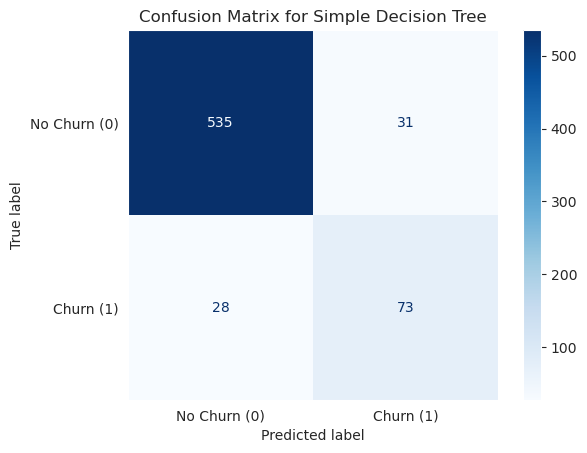

In [41]:
# visualize confusion matrix
plt.figure(figsize=(8, 6))
# ConfusionMatrixDisplay
plot_cm = ConfusionMatrixDisplay(cm, display_labels=['No Churn (0)', 'Churn (1)'])
plot_cm.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Simple Decision Tree')
plt.grid(False); # turn off grid
plt.show();

# **Hyperparameter Optimisation: GridSearchCV**
To improve the Decision Tree's performance, we implement GridSearchCV to systematically test combinations of depth and leaf size. We have prioritised Recall as our scoring metric to ensure the model captures as many potential churners as possible. By using 5-fold cross-validation, we ensure that our chosen parameters are robust and not biased by a single split of the data.

In [42]:
# Check best parameters for decision tree classifier
# check using our base model
grid_params = {
    'max_depth':[3,5,8,10],
    'min_samples_leaf':[10,30,50,70],
    'min_samples_split':[30,50,70,90]
}
# create an instance of GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=grid_params,
    scoring='recall', # recall of positive class Churn
    cv=5, # five-fold cross-validation
    n_jobs =-1 # run using all available processors
)

In [43]:
# execute grid search
grid_search.fit(X_train,y_train)
# output results
print(f'Best parameters are: {grid_search.best_params_}')
print(f'Best average recall:{grid_search.best_score_}')
# access best model
best_tree = grid_search.best_estimator_

Best parameters are: {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 30}
Best average recall:0.6963773069036228


# **Final Decision Tree Model**
Using the insights from our grid search, we instantiate a refined Decision Tree model. We have set a maximum depth of 8 to control complexity and applied ``class_weight='balanced'`` to specifically address the churn imbalance. By incorporating these specific constraints on leaf and split sizes, we aim to build a model that is both highly sensitive to churn signals and resistant to overfitting.


In [44]:
# instantiate and fit classifier
tree_model2 = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=8,min_samples_leaf=10,min_samples_split=30,class_weight='balanced')
tree_model2.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",30
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

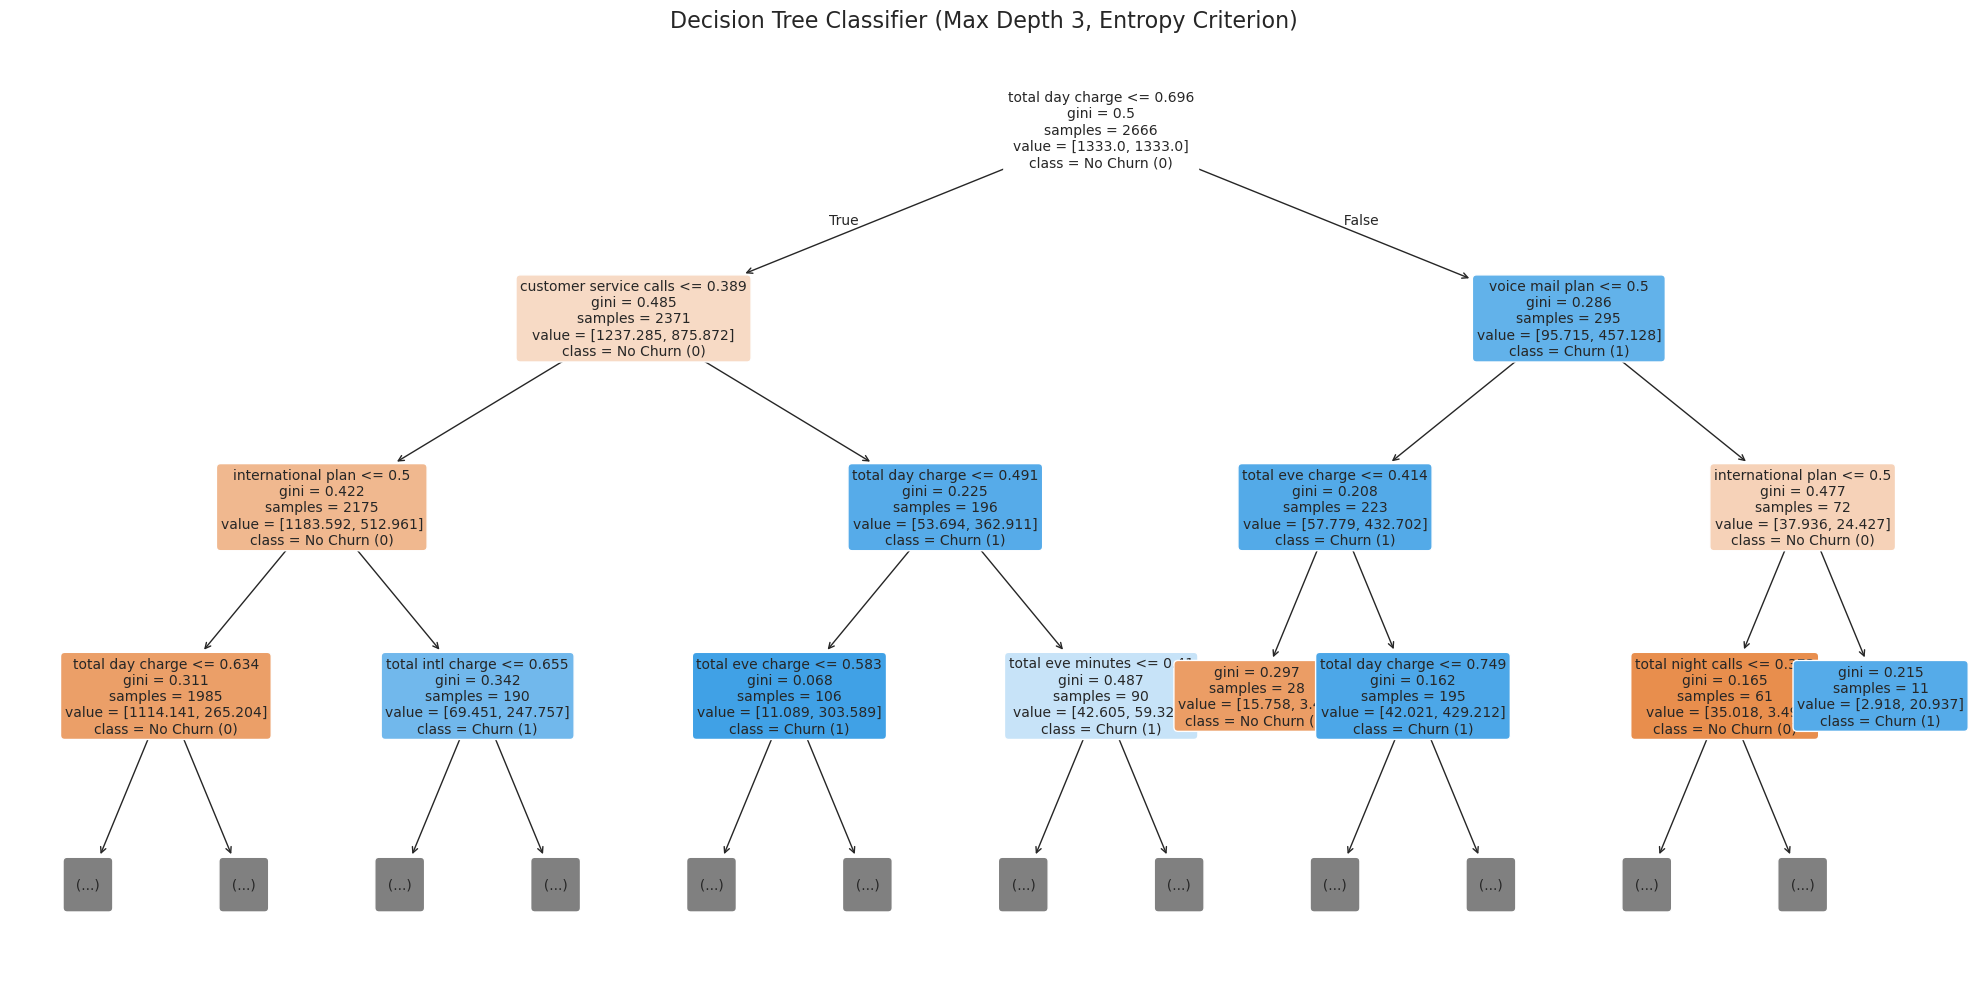

In [45]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model2, 
    max_depth=3,  # Only show the top 3 levels
    feature_names=X_train.columns.tolist(),
    class_names=['No Churn (0)', 'Churn (1)'],
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Decision Tree Classifier (Max Depth 3, Entropy Criterion)", fontsize=16)
plt.tight_layout()
plt.show()

In [46]:
y_pred_tree2 = tree_model2.predict(X_test)

In [47]:
# calculate probability scores for each datapoint
y_probs_tree2 = tree_model2.predict_proba(X_test)[:, 1]
# Calculate the FPR and TPR
fpr_tree2, tpr_tree2, thresholds_tree2 = roc_curve(y_test, y_probs_tree2)
# 3. Calculate the AUC score
roc_auc = auc(fpr_tree2, tpr_tree2)
print(roc_auc)

0.8892173669663787


In [48]:
print("Accuracy",round(accuracy_score(y_test, y_pred_tree2), 4),
        "Precision",round(precision_score(y_test, y_pred_tree2), 4),
        "Recall",round(recall_score(y_test, y_pred_tree2), 4),
        "F1-Score",round(f1_score(y_test, y_pred_tree2), 4),
        "ROC-AUC",round(roc_auc_score(y_test, y_probs_tree2), 4))

Accuracy 0.9115 Precision 0.6721 Recall 0.8119 F1-Score 0.7354 ROC-AUC 0.8892


In [49]:
# print confusion matrix
cm2 = confusion_matrix(y_test,y_pred_tree2)
print(cm2)

[[526  40]
 [ 19  82]]


<Figure size 800x600 with 0 Axes>

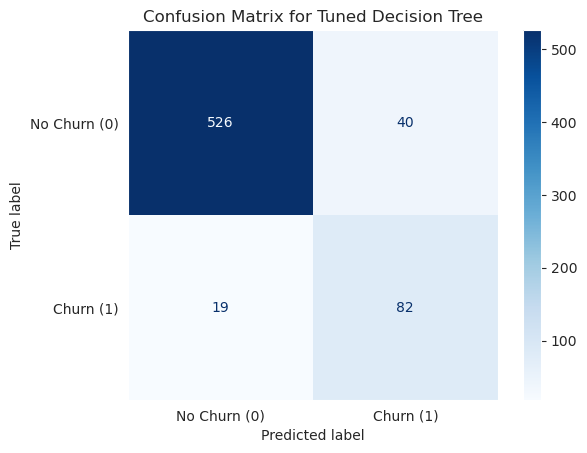

In [50]:
# visualize confusion matrix
plt.figure(figsize=(8, 6))
# ConfusionMatrixDisplay
plot_cm = ConfusionMatrixDisplay(cm2, display_labels=['No Churn (0)', 'Churn (1)'])
plot_cm.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Tuned Decision Tree')
plt.grid(False); # turn off grid
plt.show();

# **Random Forest Classifier**
To further improve predictive performance, we implement a Random Forest Classifier as an ensemble method. By training 100 individual decision trees and aggregating their results, the model reduces variance and provides more stable predictions than a single tree. We continue to use ```class_weight='balanced'``` to ensure the model remains sensitive to the churn class, leveraging parallel processing ```(n_jobs=-1)``` for efficient computation.

In [51]:
# Instantiate the model with hyperparameters
# max_depth: prevents trees from memorizing noise
# min_samples_leaf: ensures each 'leaf' is based on a representative group
rf = RandomForestClassifier(
    n_estimators=100,           # Slightly more trees for stability
    max_depth=10,                # Keeps the model from over-complicating
    min_samples_leaf=5,          # Each leaf must have at least 5 samples
    class_weight='balanced',     # Essential for the Churn/Non-Churn imbalance
    random_state=42,             # For reproducibility
    n_jobs=-1                    # Uses all processor cores for speed
)

# 2. Fit the model to your training data
rf.fit(X_train, y_train)

# 3. Quick check on the test set
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

print(f"Random Forest Recall: {recall_score(y_test, rf_preds):.4f}")
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, rf_probs):.4f}")

Random Forest Recall: 0.8020
Random Forest ROC-AUC: 0.9320


In [52]:
# print confusion matrix
cm_rf = confusion_matrix(y_test,rf_preds)
print(cm_rf)

[[551  15]
 [ 20  81]]


<Figure size 800x600 with 0 Axes>

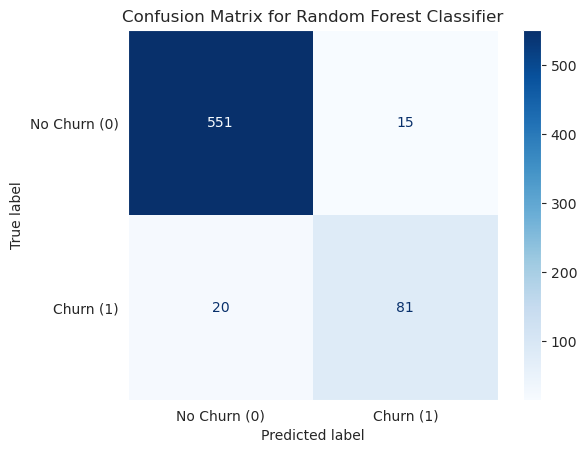

In [53]:
# visualize confusion matrix
plt.figure(figsize=(8, 6))
# ConfusionMatrixDisplay
plot_cm = ConfusionMatrixDisplay(cm_rf, display_labels=['No Churn (0)', 'Churn (1)'])
plot_cm.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.grid(False); # turn off grid
plt.show();

# **MODEL EVALUATION ANALYSIS**
The final evaluation below reveals a significant progression in predictive capability, moving from baseline linear models to sophisticated ensemble methods. While Logistic Regression provides an initial benchmark, its relatively low precision makes it less ideal for high-stakes business decisions, as it frequently misidentifies loyal customers as potential churners. The Tuned Decision Tree demonstrates a notable improvement, achieving the highest individual Recall (0.8119), which is vital for catching the maximum number of departing customers.

However, the Random Forest Classifier is identified as the most robust solution for SyriaTel. Although its Recall (0.8020) is marginally lower than the tuned Decision Tree, it delivers a significantly higher Precision (0.8438) and the best overall F1-Score (0.8223). This balance is critical for business efficiency: it allows the company to capture over 80% of churners while ensuring that marketing resources and retention discounts are not wasted on loyal customers. Furthermore, the Random Forest's superior ROC-AUC (0.9320) confirms its exceptional ability to distinguish between classes across various thresholds, providing a more stable and reliable tool for proactive customer management than a single decision tree.

In [54]:
# Evaluate model
# initiate empty list to store our metrics
results_list = []

model_list = [log_reg, log_reg2, tree_model, tree_model2, rf]
model_names = ["LR Default", "LR Balanced", "DT Default", "DT Tuned", "RF Tuned"]

for name, model in zip(model_names, model_list):
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    
    # Collect metrics in a dictionary
    # We use 'binary' average to get metrics specifically for the Churn class (1)
    results_list.append({
        "Model Name": name,
        "Accuracy": round(accuracy_score(y_test, preds), 4),
        "Precision": round(precision_score(y_test, preds), 4),
        "Recall": round(recall_score(y_test, preds), 4),
        "F1-Score": round(f1_score(y_test, preds), 4),
        "ROC-AUC": round(roc_auc_score(y_test, probs), 4)
    })

# Create the DataFrame
results_df = pd.DataFrame(results_list)

# Display the final table
results_df.style.highlight_max(axis=0, color='lightgreen')
display(results_df)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,LR Default,0.7841,0.3897,0.7525,0.5135,0.8276
1,LR Balanced,0.7466,0.3468,0.7624,0.4768,0.7874
2,DT Default,0.9115,0.7019,0.7228,0.7122,0.8340
3,DT Tuned,0.9115,0.6721,0.8119,0.7354,0.8892
4,RF Tuned,0.9475,0.8438,0.8020,0.8223,0.9320


# **FEATURE IMPORTANCE - RANDOM FOREST**
In this section we look at the features that drive churn the most. To help SyriaTel move from simply predicting churn to understanding its root causes, we can visualize the Feature Importances. This allows the business to see which specific customer behaviors are most strongly linked to the decision to leave.

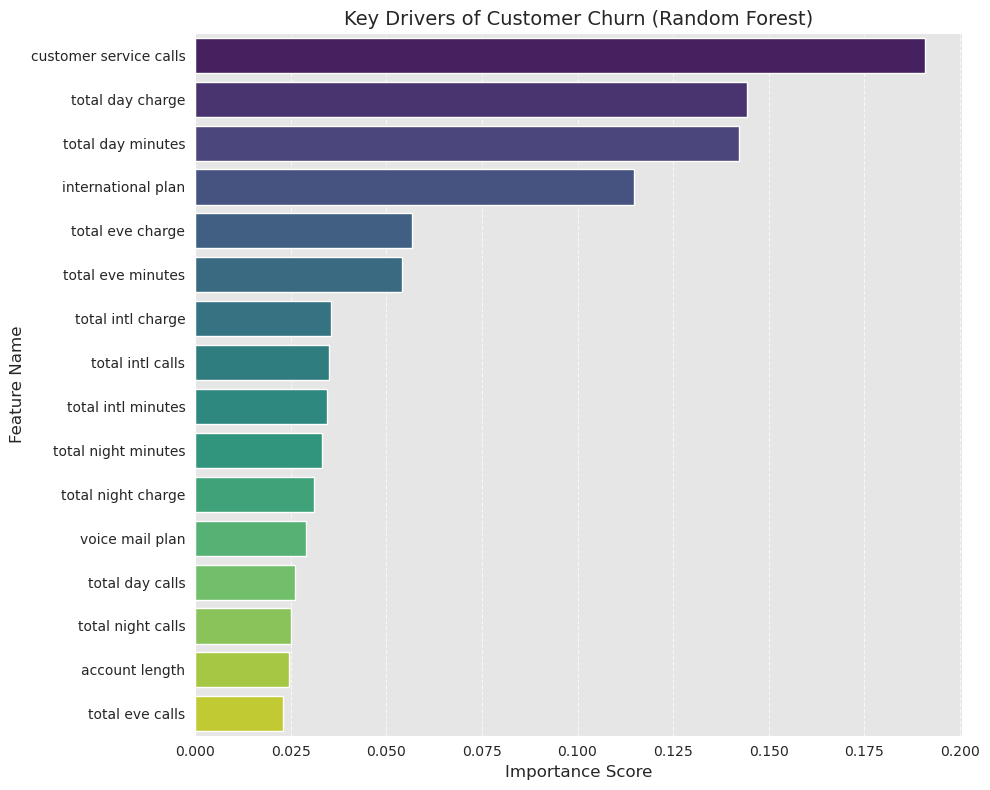

In [55]:
# Extract importances from the fitted model
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.title('Key Drivers of Customer Churn (Random Forest)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **BUSINESS RECOMMENDATIONS**
- Usage-Based Incentives: Target high-usage customers with tiered data plans or flat-rate upgrades to mitigate churn driven by high daily charges.
- Support-Triggered Intervention: Implement a "priority resolution" flag for customers reaching three service calls to resolve persistent technical grievances before they leave.
- International Plan Optimization: Revise the international plan pricing or features to improve perceived value, as current plan-holders show a significantly higher risk of churn.
- Proactive Retention Alerts: Use the model’s churn probability scores to deploy automated, personalized discounts to high-risk customers during their predicted departure window.